In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
import seaborn as sns

In [98]:
# Load your data from the CSV file
data = pd.read_csv('measures_data.csv') #graph fingerprint

#### Random Forest Classifier model

In [99]:

# Assuming the target variable is in a column named 'efficiency'
X = data.drop('efficiency', axis=1)
y = data['efficiency']

# Convert 'efficiency' to binary labels
y_binary = (y > y.mean()).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.5, random_state=42)

# Initialize and train the Random Forest Classifier model
classifier_model = RandomForestClassifier(random_state=42)
classifier_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier_model.predict(X_test)

# Calculate and print the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[69  0]
 [ 0 27]]

Accuracy: 1.0


### Separating classes by PCA

In [100]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(X_train)
X_std_validation, _, _ = get_normed_mean_cov(X_test)

In [101]:
# Make PCA
pca2 = PCA(n_components=10, whiten=True)
pca2.fit(X_std)
X_red = pca2.transform(X_std)
                       
# Make SVC
linclass2 = SVC()
linclass2.fit(X_red,y_train)


def get_cmap(n):
    #colorz = plt.cm.cool
    colorz = plt.get_cmap('jet')
    return [ colorz(float(i)/n) for i in range(n)]

colorz = get_cmap(10)
colors = [colorz[yy] for yy in y_train]

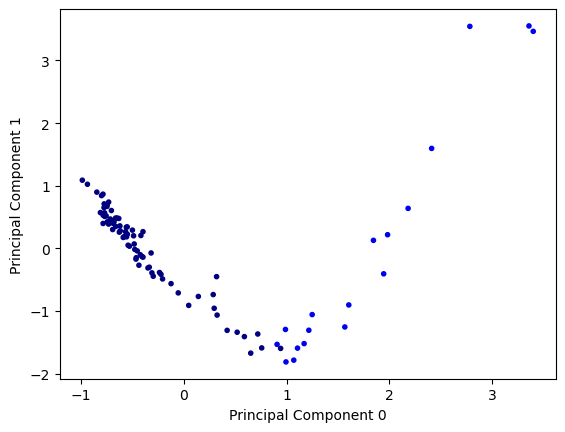

In [102]:
plt.scatter(X_red[:,0], X_red[:,1], 
        color=colors, marker='.')
plt.xlabel("Principal Component 0")
plt.ylabel("Principal Component 1")
plt.show()

### See the classification accuracy of PCA

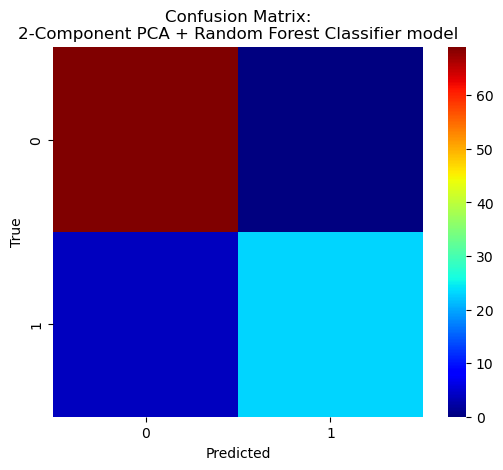

In [103]:

X_red_validation = pca2.transform(X_std_validation)
yhat_validation = linclass2.predict(X_red_validation)

y_validation = y_test

pca2_cm = confusion_matrix(y_validation,yhat_validation)
sns.heatmap(pca2_cm, square=True, cmap='jet')
plt.title('Confusion Matrix:\n2-Component PCA + Random Forest Classifier model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

### Evaluate all the measures

In [104]:

# List of target variables (features)
measures_names = [
    'density',
    'efficiency',
    'frac_largest_connected_component',
    'connected_components_ent',
    'frac_center',
    'frac_periphery',
    'frac_barycenter',
    'transitivity',
    'avg_clustering',
    'avg_square_clustering',
    'modularity',
    'assortativity_coefficient_analysis',
    'normalized_shortest_path_length_analysis',
    'eccentricity_avg',
    'degree_analysis_avg',
    'communicability_avg',
    'similarity_analysis_avg',
    'Avg_Node_betweenness_centrality',
    'Avg_edge_betweenness_centrality'
]
# Iterate through each measure
for measure_name in measures_names:
    X = data.drop(measure_name, axis=1)
    y = data[measure_name]

    # For binary classification, you might want to convert the target variable to binary labels (0 or 1)
    y_binary = (y > y.mean()).astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.50, random_state=42)

    # Initialize and train the Random Forest Classifier model
    classifier_model = RandomForestClassifier(random_state=42)
    classifier_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier_model.predict(X_test)

    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for {measure_name}:\n{cm}")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("\n")




Confusion matrix for density:
[[43  6]
 [ 2 45]]
Accuracy: 0.9166666666666666


Confusion matrix for efficiency:
[[69  0]
 [ 0 27]]
Accuracy: 1.0


Confusion matrix for frac_largest_connected_component:
[[35  1]
 [ 1 59]]
Accuracy: 0.9791666666666666


Confusion matrix for connected_components_ent:
[[58  1]
 [ 1 36]]
Accuracy: 0.9791666666666666


Confusion matrix for frac_center:
[[69  0]
 [ 5 22]]
Accuracy: 0.9479166666666666


Confusion matrix for frac_periphery:
[[70  1]
 [ 3 22]]
Accuracy: 0.9583333333333334


Confusion matrix for frac_barycenter:
[[70  2]
 [ 0 24]]
Accuracy: 0.9791666666666666


Confusion matrix for transitivity:
[[27  8]
 [ 8 53]]
Accuracy: 0.8333333333333334


Confusion matrix for avg_clustering:
[[37  2]
 [ 1 56]]
Accuracy: 0.96875


Confusion matrix for avg_square_clustering:
[[37  3]
 [ 2 54]]
Accuracy: 0.9479166666666666


Confusion matrix for modularity:
[[56  2]
 [ 2 36]]
Accuracy: 0.9583333333333334


Confusion matrix for assortativity_coefficient_analys

### Initialize and train the MLP Regressor model

In [105]:


# Load your data from the CSV file
data = pd.read_csv('measures_data.csv')

# Assuming the target variable is in a column named 'target'
X = data.drop('efficiency', axis=1)
y = data['efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize and train the MLP Regressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")

# Optionally, you can print actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error: 0.00299
       Actual  Predicted
45   0.866037   1.116252
136  0.084499   0.074293
76   0.100635   0.042199
143  0.080338   0.091688
113  0.050328   0.059527
..        ...        ...
10   0.048630   0.109291
62   0.035675   0.037877
96   0.062373   0.036128
139  0.060821   0.064908
0    0.281235   0.276419

[96 rows x 2 columns]


### See the clusters with PCA

Text(0, 0.5, 'Second Principal Component')

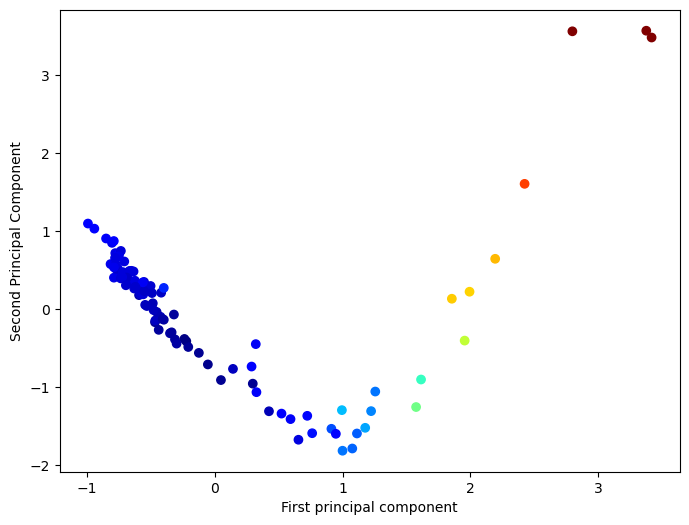

In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='jet')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Initialize and train the Linear Regression model

In [107]:



# Assuming the target variable is in a column named 'density'
target_variable = 'density'
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"Mean Absolute Error: {mae:.5f}")
print(f"R-squared: {r2:.5f}")

# Analyze coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print(coefficients_df)


Mean Squared Error: 0.00386
Mean Absolute Error: 0.04124
R-squared: 0.93375
                                     Feature  Coefficient
0                                 efficiency     0.215332
1           frac_largest_connected_component    -0.139121
2                   connected_components_ent    -0.027529
3                                frac_center    -0.018559
4                             frac_periphery    -0.051716
5                            frac_barycenter    -0.123232
6                               transitivity    -0.011403
7                             avg_clustering     0.094650
8                      avg_square_clustering    -0.017107
9                                 modularity    -0.075998
10        assortativity_coefficient_analysis    -0.011247
11  normalized_shortest_path_length_analysis    -0.041473
12                          eccentricity_avg    -0.010080
13                       degree_analysis_avg     0.150290
14                       communicability_avg     0.023

Text(0, 0.5, 'Second Principal Component')

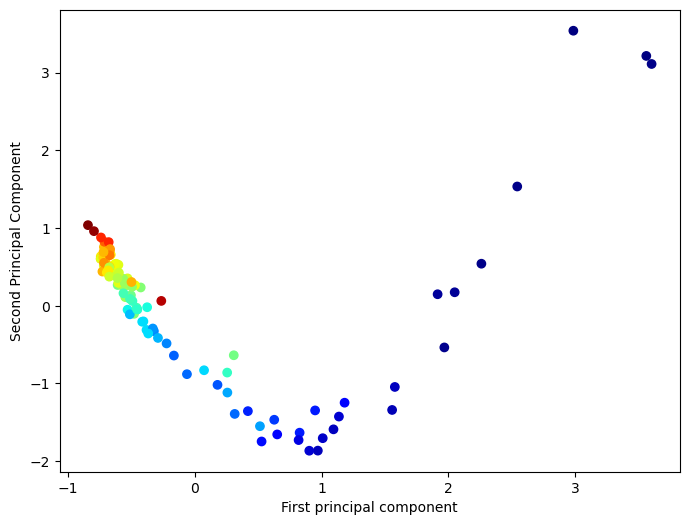

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='jet')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

#### By analyzing the coefficients, we can understand the impact of each feature on the target variable. Features with larger coefficients have a stronger impact on the predictions. Keep in mind that the importance of features may vary based on the specific characteristics of your dataset.

In [109]:


# Loop through each target variable
for target_variable in measures_names:
    # Separate features and target variable
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]

    # Feature scaling (standardization)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

    # Initialize and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linear_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results for each target variable
    print(f"\nTarget Variable: {target_variable}")
    print(f"Mean Squared Error: {mse:.5f}")
    print(f"Mean Absolute Error: {mae:.5f}")
    print(f"R-squared: {r2:.5f}")

    # Analyze coefficients
    coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
    print(coefficients_df)



Target Variable: density
Mean Squared Error: 0.00386
Mean Absolute Error: 0.04124
R-squared: 0.93375
                                     Feature  Coefficient
0                                 efficiency     0.215332
1           frac_largest_connected_component    -0.139121
2                   connected_components_ent    -0.027529
3                                frac_center    -0.018559
4                             frac_periphery    -0.051716
5                            frac_barycenter    -0.123232
6                               transitivity    -0.011403
7                             avg_clustering     0.094650
8                      avg_square_clustering    -0.017107
9                                 modularity    -0.075998
10        assortativity_coefficient_analysis    -0.011247
11  normalized_shortest_path_length_analysis    -0.041473
12                          eccentricity_avg    -0.010080
13                       degree_analysis_avg     0.150290
14                       com